In [1]:
# collection, defaultdict and lambda
import numpy as np
from collections import defaultdict

visited_pairs = defaultdict(lambda: np.ones(2))  # {"key": np.array([0, 0])}
print(visited_pairs[1][1])
visited_pairs[1][1] += 1
print(visited_pairs[1][1])

1.0
2.0


In [8]:
# namedtuple
from collections import namedtuple
experience = namedtuple("Experience", field_names=[
                        "state", "action", "reward", "next_state", "done"])
state, action, reward, next_state, done = [1, 0], 1, 0, [1, 1], 0
e = experience(state, action, reward, next_state, done)
e.next_state # like object

[1, 1]

In [6]:
# sample multiple times from a container (deque or list) 
import random
memory = [0, 1, 2, 3]
batch_size = 3
experiences = random.sample(memory, k=batch_size)
print(experiences)

[0, 1, 2]


In [54]:
# Ornstein-Uhlenbeck process
# Problem: action is just noise!! All the more since a (-1, 1) clipping is applied
# action before noise = [-0.951146    0.9702262  -0.7887909   0.51375425]
# self.noise.state to add = [0.59845691 0.87389752 0.69865036 0.64622363]

import numpy as np
import copy
class OUNoise:
    """Ornstein-Uhlenbeck process.
    update internal x with x += dx
    and dx = 0.15 * ([mu1, mu2] - [x1, x2]) + 0.2 * [rdm1, rdm2]
    In action += self.noise.sample()"""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)  # 0
        print("self.mu = {}, shape self.mu = {} ".format(self.mu, np.shape(self.mu)))
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)
        print("self.mu = {}, self.state = copy.copy(self.mu) = {}".format(
            self.mu, self.state))

    def sample(self):
        """Update internal state and return it as a noise sample."""
        print("---")
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * \
            np.array([random.random() for i in range(len(x))])
        print("x = {}, dx = {}".format(x, dx))
        self.state = x + dx
        print("self.state = {}".format(self.state))
        return self.state

In [55]:
noise = OUNoise(size=2, seed=1)
noise.sample()
noise.sample()
noise.sample()

self.mu = [0. 0.], shape self.mu = (2,) 
self.mu = [0. 0.], self.state = copy.copy(self.mu) = [0. 0.]
---
x = [0. 0.], dx = [0.02687285 0.16948675]
self.state = [0.02687285 0.16948675]
---
x = [0.02687285 0.16948675], dx = [0.148724   0.02559079]
self.state = [0.17559685 0.19507754]
---
x = [0.17559685 0.19507754], dx = [0.07274749 0.06063658]
self.state = [0.24834434 0.25571412]


array([0.24834434, 0.25571412])

In [62]:
# from torch to numpy. And mean and std of a matrix
# can't convert CUDA tensor to numpy.
# Use Tensor.cpu() to copy the tensor to host memory first
import torch
actions = torch.tensor([[ 0.0491, -0.0112, -0.0553, -0.0417],
        [ 0.0352, -0.0107, -0.0702, -0.0496],
        [ 0.0386, -0.0140, -0.0600, -0.0425]]).data.numpy()
print(np.shape(actions))
print(actions.mean(0))
print(actions.std(0))

(3, 4)
[ 0.04096666 -0.01196667 -0.06183334 -0.0446    ]
[0.00591627 0.0014522  0.0062195  0.00355059]


In [53]:
# need for copy!
mu = np.ones(2)
state = mu
state += np.ones(2)
print(mu)

[2. 2.]


In [68]:
import torch
import torch.nn as nn
def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]  # = 4
    print(layer.weight.data)  # weights
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)  # lim = 1/sqrt(nb_output)
l1 = nn.Linear(2, 4)
print(hidden_init(l1))
print(*hidden_init(l1))

tensor([[-0.6969,  0.4589],
        [-0.5763,  0.6256],
        [ 0.2240,  0.5136],
        [-0.2393, -0.5557]])
4
(-0.5, 0.5)
tensor([[-0.6969,  0.4589],
        [-0.5763,  0.6256],
        [ 0.2240,  0.5136],
        [-0.2393, -0.5557]])
4
-0.5 0.5


In [ ]:
# draft:
agent_kwargs = {"state_size": state_size, "action_size": action_size, "random_seed": 10, }
agents = [Agent(**agent_kwargs) for _ in range(num_agents)]

In [2]:
# defaultdict means that if a key is not found in the dictionary ...
#     ... then instead of a KeyError being thrown, a new entry is created
d = defaultdict(int)  # specify the type
for k in "abraccadabra":
    d[k] += 1 # no need to check if key exists
d.items()

dict_items([('a', 5), ('b', 2), ('r', 2), ('c', 2), ('d', 1)])

In [3]:
# replace verbose - debug log
# https://docs.python.org/3/howto/logging.html
import logging
import sys
logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)  # level is specified
# if no destination is set, they will set a destination of the console (sys.stderr)
logger_1 = logging.getLogger(__name__)

logger_1.debug('A debug message!')
logger_1.propagate = False
# Child loggers propagate messages up to the handlers associated with their ancestor loggers.
logger_1.info('1/2 - We processed {} records'.format(len([1, 2])))
logger_1.propagate = True
logger_1.info('2/2 - We processed %d records', len([1, 2]))  # uses the old, %-style of string formatting.

# The INFO message doesn’t appear because the default level is WARNING

DEBUG:__main__:A debug message!
INFO:__main__:2/2 - We processed 2 records


In [4]:
# Advanced logging
import logging
logger_2 = logging.getLogger(__name__)
logger_2.setLevel(logging.INFO)  # lowest-severity log message a logger will handle

formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s', datefmt="%Y-%m-%d %H:%M:%S")  # specify the layout of log records in the final output
file_handler = logging.FileHandler("logfile.log")  # Handlers send the log records 
file_handler.setFormatter(formatter)

logger_2.addHandler(file_handler)
logger_2.info('2 - We processed %d records', len([1, 2]))

INFO:__main__:2 - We processed 2 records


In [5]:
# print attributes of a class (no instanciation required)
class Person:
    """ docstring of Person"""
    name = "John"  # class variable shared by all instances
    def f(self):
        pass
print(Person.__doc__)
print(Person.f)
print(Person.name)

 docstring of Person
<function Person.f at 0x0000020669C2EB70>
John


In [6]:
print(help(abs))

Help on built-in function abs in module builtins:

abs(x, /)
    Return the absolute value of the argument.

None


In [7]:
# unpack tuple
sar = ((20, 6, True), 0, 1.0)
(state, done, reward) = sar  # unpack
print(state)
print(reward)
print(*sar)  #  *-operator to unpack the arguments out of a list or tuple
state, done, reward = (*sar,)  # unpack
print(state)
print(reward)

(20, 6, True)
1.0
(20, 6, True) 0 1.0
(20, 6, True)
1.0


In [8]:
# In Python, everything is object
x = -2
# In the expression modname.funcname, modname is a module object and funcname is an attribute of it
# The only operations understood by instance objects are attribute references.
# There are two kinds of valid attribute names:
#     - data attributes
print(x.real)  # a data attribute, "numerator" is also one
#     - and methods
print(x.__abs__())  # a method
print(help(int))

-2
2
Help on class int in module builtins:

class int(object)
 |  int(x=0) -> integer
 |  int(x, base=10) -> integer
 |  
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |  
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |  
 |  Methods defined here:
 |  
 |  __abs__(self, /)
 |      abs(self)
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __bool__(self, /)
 |      self != 0
 |  
 |  __ceil__(...)
 |      Ceili

In [9]:
# product of elements in a list
import gym
import gym.spaces
env = gym.make('Blackjack-v0')
nb_possible_states = np.prod([elem.n for elem in env.observation_space.spaces])

In [10]:
# If-Else one-line
reward = 0.5 
print('You won :)\n') if reward > 0 else print('You lost :(\n')
state = [20]
probs = [0.8, 0.2] if state[0] > 18 else [0.2, 0.8]
action = np.random.choice(np.arange(2), p=probs)

You won :)



In [11]:
# zip
episode = [((12, 10, False), 1, 0), ((13, 10, False), 1, 0),
           ((20, 10, False), 0, 1.0)]
states, actions, rewards = zip(*episode)
print(actions)
gamma = 2
discounts = [gamma**i for i in range(len(rewards)+1)]
print(discounts)

(1, 1, 0)
[1, 2, 4, 8]


In [12]:
# enumerate
for i, state in enumerate(states):
    print(i)
    print(state)
    print(states[i])  # same as state
    print(actions[i])  # way to access the corresponding action

my_list = ['apple', 'banana', 'grapes', 'pear']
# argument = where to start the counter
counter_list = list(enumerate(my_list, 1))
print(counter_list)
# Output: [(1, 'apple'), (2, 'banana'), (3, 'grapes'), (4, 'pear')]

0
(12, 10, False)
(12, 10, False)
1
1
(13, 10, False)
(13, 10, False)
1
2
(20, 10, False)
(20, 10, False)
0
[(1, 'apple'), (2, 'banana'), (3, 'grapes'), (4, 'pear')]


In [13]:
# clip of decay
epsilon = 1
eps_decay = 0.999
eps_min = 0.05
for i in range(10):
    epsilon = max(epsilon*eps_decay, eps_min)

In [14]:
# argmax and dict()
Q = defaultdict(lambda: np.zeros(2))
Q[1][0] = 0
Q[1][1] = 1
Q[2][0] = 2
policy = dict((k,np.argmax(v)) for k, v in Q.items())
print(policy)

{1: 1, 2: 0}


In [15]:
# monitor progress
i_episode = 100
num_episodes = 1000
if i_episode % 10 == 0:
    print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
    sys.stdout.flush()

Episode 100/1000.

In [16]:
max_reward = 0
for i in range(10000):
    print("\r {}".format(i), sep=' ', end='', flush=True)
    if(i % 1000 == 0):
        print("\npause - max_reward=", max_reward)
    max_reward = max(max_reward, i)

 0
pause - max_reward= 0
 1000
pause - max_reward= 999
 2000
pause - max_reward= 1999
 3000
pause - max_reward= 2999
 4000
pause - max_reward= 3999
 5000
pause - max_reward= 4999
 6000
pause - max_reward= 5999
 9000
pause - max_reward= 8999
 9999

In [17]:
import numpy as np
scores = [1, 1, 1, 1, 1, 1]
np.arange(len(scores))

array([0, 1, 2, 3, 4, 5])

In [18]:
# multiply lists
rewards = np.array([1, 2, 3, 4])
discounts = np.array([1, 1, 1, 1, 1])
i = 1
print(rewards[i:])
print(discounts[:-(1+i)])
print(sum(rewards[i:]*discounts[:-(1+i)]))

[2 3 4]
[1 1 1]
9


In [19]:
print("simon /r 1".rstrip())
'test string\n'.rstrip()

simon /r 1


'test string'

In [20]:
# np.zeros requires a tuple
V_opt = np.zeros((4,12))
print(V_opt)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [21]:
reshape(4,12)

NameError: name 'reshape' is not defined

In [24]:
# linspace()
num_episodes = 100
avg_scores = [1, 2, 3, 4, 5]
print(np.linspace(0,num_episodes,len(avg_scores)))

# arange
print(np.arange(3, 8, 2))

[  0.  25.  50.  75. 100.]
[3 5 7]


In [25]:
import check_test

ModuleNotFoundError: No module named 'check_test'

In [28]:
# np.arange()
import random
random.choice(np.arange(env.action_space.n))

1

In [29]:
# deque
from collections import deque
# idea: `avg_rewards[0]` is the average return collected by the agent over the first 100 episodes.
import numpy as np
num_episodes = 3
avg_scores = deque(maxlen=num_episodes)   # average scores over every plot_every episodes
tmp_scores = [10, 12]
avg_scores.append(np.mean(tmp_scores))
tmp_scores = [8, 10]
avg_scores.append(np.mean(tmp_scores))
tmp_scores = [6, 8]
avg_scores.append(np.mean(tmp_scores))
tmp_scores = [4, 6]
avg_scores.append(np.mean(tmp_scores))
print(avg_scores)
print(np.asarray(avg_scores))  # note asarray (not array)

deque([9.0, 7.0, 5.0], maxlen=3)
[9. 7. 5.]


In [30]:
# dot product
a = np.array([1, 2])
b = np.array([10, 20])
np.dot(a, b)

50

In [33]:
# initialize best average reward
import math
best_avg_reward = -math.inf

In [34]:
import numpy as np
nA = 3
print(np.arange(nA))
prob = np.ones(nA) / nA
np.random.choice(np.arange(nA), p=prob)

[0 1 2]


1

In [35]:
nA = 5
np.random.choice(np.arange(nA))

1

In [36]:
# https://gym.openai.com/docs/#spaces
import gym
import gym.spaces
env = gym.make('CartPole-v0')
print(env.action_space)
#> Discrete(2)
print(env.observation_space)
#> Box(4,)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Discrete(2)
Box(4,)


In [37]:
# np.digitize
# Return the indices of the bins to which each value in input array belongs.
x = np.array([0.2, 6.4, 3.0, 1.6])
bins = np.array([0.0, 1.0, 2.5, 4.0, 10.0])
inds = np.digitize(x, bins)
inds

array([1, 4, 3, 2], dtype=int64)

In [38]:
# print(*objects, sep=' ', end='\n', file=sys.stdout, flush=False)
a = 5
print("a =", a, a, sep='00000', end='\n\n\n')

a =000005000005




In [39]:
# repr - to print a list
samples = np.array([[-1.0 , -5.0], [-0.81, -4.1], [-0.8 , -4.0],])
print(samples)
print("\nSamples:", repr(samples), sep="\n")

[[-1.   -5.  ]
 [-0.81 -4.1 ]
 [-0.8  -4.  ]]

Samples:
array([[-1.  , -5.  ],
       [-0.81, -4.1 ],
       [-0.8 , -4.  ]])


In [40]:
# transpose, honrizontal stack and [:, 1:]
low = [-1.0, -5.0]
high = [1.0, 5.0]
grid = [np.array([1, 2, 3, 4]), np.array([11, 12, 13, 14])]
res = np.hstack((np.array([low]).T, grid, np.array([high]).T))
print(res)
res[:, 1:] * 2

[[-1.  1.  2.  3.  4.  1.]
 [-5. 11. 12. 13. 14.  5.]]


array([[ 2.,  4.,  6.,  8.,  2.],
       [22., 24., 26., 28., 10.]])

In [41]:
# 3 actions and 4*4 state space
state_grid = [
    np.array([-1.02, -0.84, -0.66, -0.48]),
    np.array([-5.600e-02, -4.200e-02, -2.800e-02, -1.400e-02])
]
action_size = 3
state_size = tuple(len(splits) + 1 for splits in state_grid)  # (4+1, 4+1)
print("state_size = {}".format(state_size))

state_size = (5, 5)


In [42]:
# add tuples - with "," to specify that it is a tuple
# res[block=y][row=x][column=action] - imagine it in 3d - pack them + apply rotation
shape = (5, 5) + (3,)  # (5, 5, 3)
res = np.zeros(shape=(shape))
# print(np.zeros(shape=(2,3,4)))
res[4][3][0] = 1  # target a specific point
state = (2, 2)  # access with a tuple (apply to all actions) - not a list
res[state] = 2
state = [0, 1]  # access with a list is different does not work (it only considers the first element)
res[state] = 4
print(res)

[[[4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]]

 [[4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]
  [4. 4. 4.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [2. 2. 2.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [1. 0. 0.]
  [0. 0. 0.]]]


In [43]:
max_avg_score = -np.inf

In [44]:
# pandas rolling window
import pandas as pd
import numpy as np
scores = [1, 2, 2, 3, 3, 2, 4, 5, 5, 8, 6, 10]
avg_score = np.mean(scores[-3:]) # average on the last 3 scores
print(avg_score)
rolling_window = 2
rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
print(rolling_mean)

DEBUG:matplotlib:$HOME=C:\Users\simon.chauvin
DEBUG:matplotlib:matplotlib data path C:\Users\simon.chauvin\AppData\Local\Continuum\anaconda3\envs\drlnd\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:loaded rc file C:\Users\simon.chauvin\AppData\Local\Continuum\anaconda3\envs\drlnd\lib\site-packages\matplotlib\mpl-data\matplotlibrc
DEBUG:matplotlib:matplotlib version 2.2.3
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:loaded modules: ['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', 'encodings.cp1252', 'site', 'os', 'errno', 'stat', '_stat', 'ntpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_bootlocale', '_locale', 'types', 'functools', '_functoo

8.0
0     NaN
1     1.5
2     2.0
3     2.5
4     3.0
5     2.5
6     3.0
7     4.5
8     5.0
9     6.5
10    7.0
11    8.0
dtype: float64


In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Set plotting options
%matplotlib inline
plt.style.use('ggplot')
np.set_printoptions(precision=3, linewidth=120)

DEBUG:matplotlib:CACHEDIR=C:\Users\simon.chauvin\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\simon.chauvin\.matplotlib\fontList.json
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [46]:
# 
elements = [1, 2, 3, 4]
key = 'a'
res0 = map(lambda e: (e, key), elements)

# or zip list with a single element
import itertools
res1 = zip(elements, itertools.repeat(key))
print(set(res0))
print(list(res1))

{(2, 'a'), (1, 'a'), (4, 'a'), (3, 'a')}
[(1, 'a'), (2, 'a'), (3, 'a'), (4, 'a')]


In [47]:
# list comprehention with several objects
tiling_specs = [((10, 10), (-0.066, -0.33)),  # with tuple
                [(10, 10), (0.0, 0.0)]]  # with list
for bins, offsets in tiling_specs:
    print("bins={}, offsets={}".format(bins, offsets))

bins=(10, 10), offsets=(-0.066, -0.33)
bins=(10, 10), offsets=(0.0, 0.0)


In [48]:
# make a unzip for list comprehension
bins=(10, 10)
offsets=(5.0, 2.0)
low = (-1, 1)
high = (0, 2)
res = list(zip(*[low, high, bins, offsets]))
print(res)
# list comprehension
[(low + high, offset + binn) for low, high, binn, offset in res]

[(-1, 0, 10, 5.0), (1, 2, 10, 2.0)]


[(-1, 15.0), (3, 12.0)]

In [49]:
sample = (-1.2, -5.1)
grid = [
    np.array([-0.866, -0.666, -0.466, -0.266, -0.066,  0.134,  0.334,  0.534,  0.734]),
    np.array([-4.33, -3.33, -2.33, -1.33, -0.33,  0.67,  1.67,  2.67,  3.67])
]
list(zip(sample, grid))

[(-1.2,
  array([-0.866, -0.666, -0.466, -0.266, -0.066,  0.134,  0.334,  0.534,  0.734])),
 (-5.1,
  array([-4.33, -3.33, -2.33, -1.33, -0.33,  0.67,  1.67,  2.67,  3.67]))]

In [50]:
# flatten tuple
my_list = [(1, 0), (2, 0), (3, 4)]
res0 = list((np.array(my_list)).flatten())  # numpy flatten
print(res0)
res1 = np.concatenate(my_list)  # numpy concatenate
print(res1)

[1, 0, 2, 0, 3, 4]
[1 0 2 0 3 4]


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\simon.chauvin\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000


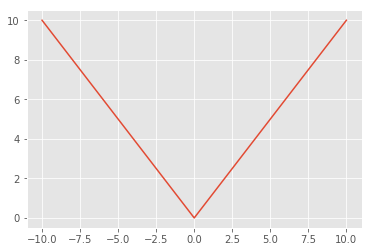

In [51]:
# numpy - instead of loop, work with vectors
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(start=-10, stop=10, num=101)
plt.plot(x, np.absolute(x))
plt.show()

In [52]:
# np.argwhere(), flatten() and np.eye() for one-hot vector conversion
# OPTION 2 for improvement: construct a stochastic policy that puts equal probability on maximizing actions
nA = 3  # go_up / stay / go_down
nS = 2  # up / down
policy = np.zeros([nS, nA]) / nA
Q = [[0.2, 0.8, 0.2], [0.8, 0.2, 0.8]]
for s in range(nS):
    q = Q[s]  # Q(A = a1, a2; S = s0)
    best_a = np.argwhere(q==np.max(q)).flatten() # [[0] [2]] -> [0, 2]
    policy[s] = np.sum([np.eye(nA)[i] for i in best_a], axis=0)/len(best_a)
    print(best_a)
    print([np.eye(nA)[i] for i in best_a])
print(policy)

[1]
[array([0., 1., 0.])]
[0 2]
[array([1., 0., 0.]), array([0., 0., 1.])]
[[0.  1.  0. ]
 [0.5 0.  0.5]]


In [53]:
# np.sum() with axis=0
Q = [[0.2, 0.8, 0.2], [0.8, 0.2, 0.8]]
print(Q)
print(np.sum(Q, axis=0))
print(np.sum(Q, axis=1))

[[0.2, 0.8, 0.2], [0.8, 0.2, 0.8]]
[1. 1. 1.]
[1.2 1.8]


In [54]:
# np.array_equal() vs all()
policy = np.array([[0.2, 0.8, 0.2], [0.8, 0.2, 0.8]])
new_policy = np.array([[0.2, 0.8, 0.2], [0.8, 0.2, 0.8]])
print((new_policy == policy).all())  # all() requires np arrays
policy = [[0.2, 0.8, 0.2], [0.8, 0.2, 0.8]]
new_policy = [[0.2, 0.8, 0.2], [0.8, 0.2, 0.8]]
print(np.array_equal(new_policy, policy))

True
True


In [55]:
# list are mutable - use copy to save their previous state
import copy
nS = 2
V = np.zeros(nS)
# try to save the previous state
old_V = V
old_V_copy = copy.copy(V)
# update is like passing by reference V to the function f(x): x[0]=1, return x
V[0] = 1
print(id(V))
print(id(old_V))
print(id(old_V_copy))
print(old_V)
print(old_V_copy)

2226862954896
2226862954896
2226862955216
[1. 0.]
[0. 0.]


In [56]:
# Python represents all its data as objects. Hence with references - use id()

#  - dict and list are mutable
#   - state can change while keeping reference constant
#   - great to use when you need to change the size of the object, example list, dict etc (like c++ Vector)
#   - poping an item from list object does change the state object, but object id will not be changed

#  - integers, floats, strings and tuple are objects that (their state) can not be changed
#   - It will raise a TypeError if you try to change it.
#   - If we assign new content, a new object is CREATED instead of the contents being modified.
#    - x = 10 or x+=10 uses an instanciation, no matter if x already exists
#   - Immutable objects are fundamentally expensive to “change”, because doing so involves creating a copy.
#   - the “value” of an immutable object can’t change, but it’s constituent objects can.
#    - my_tuple = ([0, 1])

#  - Custom classes are generally mutable (my_car.speed += 1)
#   - To simulate immutability in a class, one should override attribute setting and deletion to raise exceptions.
s = "abc"
print(id(s))  # 4702124
print(s[0])  # 'a'
s[0] = "o"
# TypeError: 'str' object does not support item assignment

2226492623984
a


TypeError: 'str' object does not support item assignment

In [58]:
# 'is' - The is operator compares the identity of two objects.
x = "simon"
y = "simon"
print(x is y)
print(x is "simon")
print(id(x) == id(y))

True
True
True


In [59]:
# 'is' - The is operator compares the identity of two objects.
x = {}
y = {}
print(x is y)
print(id(x) == id(y))

False
False


In [60]:
# reference can changes / stays when doing update or new instantiation
s = "xyz"
print(id(s))  # 800100
s += "uvw"  # state changes -> new instanciation
print(id(s))  # 4800500
l = [10]
print(id(i))  # 6348005
l[0] += 1  # state changes -> reference stays
print(id(i))  # 6348005
l = [20]  # new state -> reference stays!!
print(id(i))  # 1818848592

2226584296840
2226879809664
1807576080
1807576080
1807576080


In [61]:
# list() and dict() are mutable
# if a mutable object is called by reference in a function, it can change the original variable itself.
# call by reference, so the changes are made to the original list itself
def f(l):
    l += [2, 2]
x_mutable = [0, 1]
print(id(x_mutable))
f(x_mutable)  
print(id(x_mutable))
print(x_mutable)  # [0, 1, 2, 2]

2226862970888
2226862970888
[0, 1, 2, 2]


In [62]:
# "x = y" make them pointing to the same place in memory
x_mutable = [0, 1]
y_mutable = x_mutable  #  y will change if x is nodified
print(id(y_mutable))
print(id(x_mutable))
x_mutable += [2]
print(id(y_mutable))
print(id(x_mutable))
print(x_mutable)  # [0, 1, 2]
print(y_mutable)  # [0, 1, 2]

2226835232648
2226835232648
2226835232648
2226835232648
[0, 1, 2]
[0, 1, 2]


In [63]:
# int are not mutable
# Immutable objects can be called by reference because its value cannot be changed anyways.
# This is called pass by value
# When the value is called by the function, only the value of the variable is passed, not the object itself.
def f(i):
    i += 2
x = 0
print(id(x))
f(x)
print(id(x))  # unchanged
print(id(y))
print(x)  # 0
print(y)  # 0
y += 1
print(id(x))
print(id(y))  # changed
print(x)  # 0
print(y)  # 1

1807576048
1807576048
2226879797576
0
{}


TypeError: unsupported operand type(s) for +=: 'dict' and 'int'

In [64]:
# unmutable
x = 0
y = x #  y will change if x is nodified
print(id(x))
print(id(y))
x += 2
print(id(x))  # changed
print(id(y))  # did not change
print(x)  # 2
print(y)  # 0

1807576048
1807576048
1807576112
1807576048
2
0


In [65]:
from pprint import pprint
keys_features_list = ['position_on_segment', 'distanceToEndSegment', 'velocity', 'speed_limit', 'steering_angle', 'distance_to_crossing_from_right', 'distance_to_crossing_from_left', 'tti', 'merging_from_right', 'merging_from_left', 'opposing', 'priority_to_left', 'priority_to_right', 'horizon', 'latGap']
pprint(keys_features_list, indent=5)

[    'position_on_segment',
     'distanceToEndSegment',
     'velocity',
     'speed_limit',
     'steering_angle',
     'distance_to_crossing_from_right',
     'distance_to_crossing_from_left',
     'tti',
     'merging_from_right',
     'merging_from_left',
     'opposing',
     'priority_to_left',
     'priority_to_right',
     'horizon',
     'latGap']


In [66]:
from collections import Counter
import pprint
rewards = [0, 0, 0, 1, -1, 1, 0]
print(dict(Counter(rewards)))

{0: 4, 1: 2, -1: 1}


In [68]:
changes_in_state = 0
state = [0, 0]
next_state = [0, 0]
changes_in_state = (changes_in_state + 5) if(state == next_state) else (changes_in_state)
print(changes_in_state)

5


DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('C:\\Users\\simon.chauvin\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000


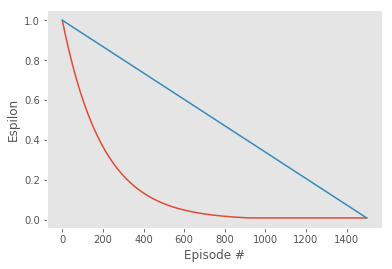

In [69]:
# np.linspace() - not np.arange()
import matplotlib.pyplot as plt
%matplotlib inline
eps_decay = 0.995
nb_episodes = 1500
eps_end = 0.01
eps_start = 1.0
eps = [max(eps_start * eps_decay ** i, eps_end) for i in range(nb_episodes)]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(eps)), eps)
plt.plot(np.arange(len(eps)), np.linspace(eps_start, eps_end, len(eps)))
plt.ylabel('Espilon')
plt.xlabel('Episode #')
plt.grid()
plt.show()

In [70]:
# use copy when reading in defaultdict
from collections import defaultdict
from copy import copy
nA = 5
state = (16, 3)
q_table = defaultdict(lambda: np.zeros(nA))

for i in range(nA):
    q_table[state][i] = 888
reader = q_table[state]
reader_copy = copy(q_table[state])
reader[1] = 9999
reader_copy[0] = 1111
print(dict(q_table))

q_table_dict = {"a": 1, "b": 2}
res = q_table_dict["a"]
res = 2
print(q_table_dict)

{(16, 3): array([ 888., 9999.,  888.,  888.,  888.])}
{'a': 1, 'b': 2}


In [9]:
# from list of step-rewards to Return G of episode, using zip
rewards = [1, 2, 5, 2]
gamma = 0.9
discounts = [gamma**i for i in range(len(rewards)+1)]
G = sum([a*b for a,b in zip(discounts, rewards)])
print(sum(rewards), " vs ", G)

10  vs  8.308


In [10]:
import gym
gym.logger.set_level(40) # suppress warnings (please remove if gives error)

In [11]:
import torch
torch.manual_seed(0) # set random seed

In [6]:
# namedtuple
from collections import namedtuple
experience = namedtuple("Experience", field_names=["state", "action"])
exp1 = experience(1, 2)
exp2 = experience(2, 3)
print(exp1)
print(exp2)

Experience(state=1, action=2)
Experience(state=2, action=3)


In [14]:
# uniform sample from deque (Memory Replay Buffer)
from collections import deque
import random
memory = deque(maxlen=3)
memory.append(exp1)
memory.append(exp2)

experiences = random.sample(memory, k=1)
print(experiences)
experiences = random.sample(memory, k=1)
print(experiences)

[Experience(state=1, action=2)]
[Experience(state=2, action=3)]


In [84]:
# next in cycle
from itertools import cycle
cycol = cycle('bgrcmk')
for i, e in enumerate(zip([1, 2, 3, 4], [5, 6, 7, 8])):
    c = next(cycol)
    print(c)

b
g
r
c


In [87]:
26249.7 - 595.34

25654.36

In [88]:
-67335.7 - 641.91

-67977.61

In [1]:
# m = [[[687.5921020507812, 653.1112670898438, 0.0, 0.0, 0.0, 0.0], [685.52685546875, 650.85595703125, 0.0, 0.0, 0.0, 5.086000442504883]], [[687.5921020507812, 653.1112670898438, 0.0, 0.0, 0.0, 0.0], [685.5632934570312, 650.8523559570312, 0.0, 0.0, 0.0, 5.085224628448486]], [[687.5921020507812, 653.1112670898438, 0.0, 0.0, 0.0, 0.0], [685.5632934570312, 650.8523559570312, 0.0, 0.0, 0.0, 5.085224628448486]], [[687.5921020507812, 653.1112670898438, 0.0, 0.0, 0.0, 0.0], [685.473388671875, 650.6638793945312, 0.0, 0.0, 0.0, 5.076412677764893]], [[687.5921020507812, 653.1112670898438, 0.0, 0.0, 0.0, 0.0], [686.0415649414062, 648.2864379882812, 0.0, 0.0, 0.0, 5.052938938140869]], [[688.72802734375, 649.2323608398438, 0.0, 0.0, 0.0, 0.0], [687.9104614257812, 642.9508666992188, 0.0, 0.0, 0.0, 5.053387641906738]], [[690.0433959960938, 645.9076538085938, 0.0, 0.0, 0.0, 0.0], [690.6132202148438, 635.4781494140625, 0.0, 0.0, 0.0, 5.063212871551514]], [[692.7338256835938, 636.155029296875, 0.0, 0.0, 0.0, 0.0], [693.9132690429688, 626.78857421875, 0.0, 0.0, 0.0, 5.080757141113281]], [[694.4078979492188, 630.6137084960938, 0.0, 0.0, 0.0, 0.0], [697.7245483398438, 617.220703125, 0.0, 0.0, 0.0, 5.094580173492432]], [[698.0549926757812, 617.536376953125, 0.0, 0.0, 0.0, 0.0], [701.7225952148438, 607.2736206054688, 0.0, 0.0, 0.0, 5.095102310180664]], [[702.060791015625, 604.9022827148438, 0.0, 0.0, 0.0, 0.0], [705.3814697265625, 598.4099731445312, 0.0, 0.0, 0.0, 5.093272686004639]], [[703.7946166992188, 598.917724609375, 0.0, 0.0, 0.0, 0.0], [708.3792114257812, 590.89306640625, 0.0, 0.0, 0.0, 5.0908122062683105]], [[706.6644287109375, 589.27587890625, 0.0, 0.0, 0.0, 0.0], [711.663818359375, 585.0750122070312, 0.0, 0.0, 0.0, 5.476902961730957]], [[708.3983154296875, 585.3970336914062, 0.0, 0.0, 0.0, 0.0], [717.57177734375, 582.1866455078125, 0.0, 0.0, 0.0, 6.19146728515625]], [[714.4966430664062, 581.6289672851562, 0.0, 0.0, 0.0, 0.0], [725.1980590820312, 583.6840209960938, 0.0, 0.0, 0.0, 6.655439376831055]], [[718.50244140625, 582.4047241210938, 0.0, 0.0, 0.0, 0.0], [734.0427856445312, 587.4644775390625, 0.0, 0.0, 0.0, 6.668034553527832]], [[728.0685424804688, 586.7269287109375, 0.0, 0.0, 0.0, 0.0], [744.277099609375, 591.54931640625, 0.0, 0.0, 0.0, 6.643499374389648]], [[733.3896484375, 589.6083984375, 0.0, 0.0, 0.0, 0.0], [754.8519287109375, 595.66064453125, 0.0, 0.0, 0.0, 6.6405863761901855]], [[744.8092041015625, 594.2630615234375, 0.0, 0.0, 0.0, 0.0], [764.6339111328125, 599.4209594726562, 0.0, 0.0, 0.0, 6.637455940246582]], [[750.1303100585938, 596.81201171875, 0.0, 0.0, 0.0, 0.0], [772.9112548828125, 602.5078735351562, 0.0, 0.0, 0.0, 6.646531581878662]], [[759.0985107421875, 601.0233764648438, 0.0, 0.0, 0.0, 0.0], [778.8601684570312, 604.8531494140625, 0.0, 0.0, 0.0, 6.714532375335693]], [[765.0175170898438, 603.5723876953125, 0.0, 0.0, 0.0, 0.0], [782.7882690429688, 608.212890625, 0.0, 0.0, 0.0, 7.343924045562744]], [[766.8709716796875, 606.121337890625, 0.0, 0.0, 0.0, 0.0], [783.5374145507812, 614.0567016601562, 0.0, 0.0, 0.0, 8.037152290344238]], [[767.4688110351562, 614.2116088867188, 0.0, 0.0, 0.0, 0.0], [780.626220703125, 622.0369262695312, 0.0, 0.0, 0.0, 8.272407531738281]], [[766.2132568359375, 619.19873046875, 0.0, 0.0, 0.0, 0.0], [776.5601806640625, 631.5221557617188, 0.0, 0.0, 0.0, 8.257205963134766]], [[762.2074584960938, 631.9436645507812, 0.0, 0.0, 0.0, 0.0], [772.4556274414062, 641.5938110351562, 0.0, 0.0, 0.0, 8.228858947753906]], [[760.0551147460938, 638.7039794921875, 0.0, 0.0, 0.0, 0.0], [768.999755859375, 650.6698608398438, 0.0, 0.0, 0.0, 8.223034858703613]], [[756.4080200195312, 650.894775390625, 0.0, 0.0, 0.0, 0.0], [765.726318359375, 658.07568359375, 0.0, 0.0, 0.0, 8.417054176330566]], [[754.7937622070312, 655.9927368164062, 0.0, 0.0, 0.0, 0.0], [760.4969482421875, 662.6580200195312, 0.0, 0.0, 0.0, 9.062416076660156]], [[749.5922241210938, 661.977294921875, 0.0, 0.0, 0.0, 0.0], [752.45654296875, 663.3714599609375, 0.0, 0.0, 0.0, 9.594033241271973]], [[745.526611328125, 662.7530517578125, 0.0, 0.0, 0.0, 0.0], [742.649169921875, 660.4241943359375, 0.0, 0.0, 0.0, 9.772817611694336]], [[735.4224853515625, 658.9849853515625, 0.0, 0.0, 0.0, 0.0], [731.3192749023438, 656.1661987304688, 0.0, 0.0, 0.0, 9.784639358520508]], [[723.2257080078125, 653.8870239257812, 0.0, 0.0, 0.0, 0.0], [719.7599487304688, 651.830322265625, 0.0, 0.0, 0.0, 9.78911304473877]], [[717.0077514648438, 651.3380737304688, 0.0, 0.0, 0.0, 0.0], [709.2213134765625, 647.6183471679688, 0.0, 0.0, 0.0, 9.814656257629395]], [[706.0665893554688, 647.126708984375, 0.0, 0.0, 0.0, 0.0], [702.0427856445312, 644.5626220703125, 0.0, 0.0, 0.0, 9.831804275512695]], [[702.2401123046875, 645.02099609375, 0.0, 0.0, 0.0, 0.0], [698.1727905273438, 642.5371704101562, 0.0, 0.0, 0.0, 10.001694679260254]], [[697.57666015625, 642.9153442382812, 0.0, 0.0, 0.0, 0.0], [694.6290893554688, 639.3363037109375, 0.0, 0.0, 0.0, 10.419142723083496]], [[696.0819702148438, 640.8096923828125, 0.0, 0.0, 0.0, 0.0], [692.9874877929688, 633.3156127929688, 0.0, 0.0, 0.0, 11.027355194091797]], [[694.1089477539062, 633.6060180664062, 0.0, 0.0, 0.0, 0.0], [694.9339599609375, 625.0335693359375, 0.0, 0.0, 0.0, 11.340516090393066]], [[694.7666625976562, 628.0647583007812, 0.0, 0.0, 0.0, 0.0], [698.809326171875, 614.9324340820312, 0.0, 0.0, 0.0, 11.365138053894043]], [[698.4136962890625, 614.5440673828125, 0.0, 0.0, 0.0, 0.0], [703.5537719726562, 603.0888061523438, 0.0, 0.0, 0.0, 11.381996154785156]], [[702.6586303710938, 600.580078125, 0.0, 0.0, 0.0, 0.0], [707.4598388671875, 593.3450927734375, 0.0, 0.0, 0.0, 11.375134468078613]], [[704.6316528320312, 594.2630615234375, 0.0, 0.0, 0.0, 0.0], [710.8226318359375, 586.55615234375, 0.0, 0.0, 0.0, 11.640625953674316]], [[708.3385009765625, 585.3970336914062, 0.0, 0.0, 0.0, 0.0], [716.1143798828125, 582.6137084960938, 0.0, 0.0, 0.0, 12.301142692565918]], [[710.9691772460938, 582.4047241210938, 0.0, 0.0, 0.0, 0.0], [723.272216796875, 583.6217041015625, 0.0, 0.0, 0.0, 12.975050926208496]], [[718.1437377929688, 583.2913208007812, 0.0, 0.0, 0.0, 0.0], [729.7125854492188, 585.535400390625, 0.0, 0.0, 0.0, 12.578271865844727]], [[721.6712036132812, 584.6212158203125, 0.0, 0.0, 0.0, 0.0], [735.3386840820312, 583.348388671875, 0.0, 0.0, 0.0, 11.818275451660156]], [[727.5304565429688, 582.8480224609375, 0.0, 0.0, 0.0, 0.0], [738.7168579101562, 578.2738647460938, 0.0, 0.0, 0.0, 11.422633171081543]], [[730.8786010742188, 575.6444091796875, 0.0, 0.0, 0.0, 0.0], [741.8111572265625, 570.4276123046875, 0.0, 0.0, 0.0, 11.353509902954102]], [[732.373291015625, 570.6572265625, 0.0, 0.0, 0.0, 0.0], [744.8054809570312, 562.4180908203125, 0.0, 0.0, 0.0, 11.409741401672363]], [[735.66162109375, 560.9046020507812, 0.0, 0.0, 0.0, 0.0], [748.915283203125, 556.84326171875, 0.0, 0.0, 0.0, 11.949626922607422]], [[738.0531616210938, 557.912353515625, 0.0, 0.0, 0.0, 0.0], [755.6051635742188, 555.1168212890625, 0.0, 0.0, 0.0, 12.637463569641113]], [[745.4668579101562, 556.2499389648438, 0.0, 0.0, 0.0, 0.0], [764.0982666015625, 557.3577880859375, 0.0, 0.0, 0.0, 12.901907920837402]], [[750.1303100585938, 557.1365356445312, 0.0, 0.0, 0.0, 0.0], [773.4442138671875, 561.082275390625, 0.0, 0.0, 0.0, 12.951269149780273]], [[759.8159790039062, 561.347900390625, 0.0, 0.0, 0.0, 0.0], [781.9550170898438, 564.5900268554688, 0.0, 0.0, 0.0, 12.947530746459961]], [[764.2402954101562, 563.0103149414062, 0.0, 0.0, 0.0, 0.0], [788.010498046875, 566.9805297851562, 0.0, 0.0, 0.0, 12.95001220703125]], [[770.0994873046875, 564.6726684570312, 0.0, 0.0, 0.0, 0.0], [791.9009399414062, 568.87744140625, 0.0, 0.0, 0.0, 13.158891677856445]], [[772.1920776367188, 565.5592651367188, 0.0, 0.0, 0.0, 0.0], [795.5752563476562, 572.7771606445312, 0.0, 0.0, 0.0, 13.728984832763672]], [[776.0184936523438, 569.7706298828125, 0.0, 0.0, 0.0, 0.0], [796.1705322265625, 579.9166259765625, 0.0, 0.0, 0.0, 14.353360176086426]], [[775.4804077148438, 579.0799560546875, 0.0, 0.0, 0.0, 0.0], [793.4073486328125, 589.242919921875, 0.0, 0.0, 0.0, 14.464476585388184]], [[773.9857177734375, 585.3970336914062, 0.0, 0.0, 0.0, 0.0], [789.7587280273438, 599.60009765625, 0.0, 0.0, 0.0, 14.491072654724121]], [[769.9799194335938, 599.8043212890625, 0.0, 0.0, 0.0, 0.0], [785.2044677734375, 611.3865356445312, 0.0, 0.0, 0.0, 14.515734672546387]], [[768.0068969726562, 607.78369140625, 0.0, 0.0, 0.0, 0.0], [780.0282592773438, 623.48681640625, 0.0, 0.0, 0.0, 14.547730445861816]], [[763.5228271484375, 624.739990234375, 0.0, 0.0, 0.0, 0.0], [775.5630493164062, 634.6937255859375, 0.0, 0.0, 0.0, 14.508687973022461]], [[761.4302368164062, 631.9436645507812, 0.0, 0.0, 0.0, 0.0], [772.0504760742188, 644.2372436523438, 0.0, 0.0, 0.0, 14.500104904174805]], [[758.0820922851562, 645.02099609375, 0.0, 0.0, 0.0, 0.0], [769.390625, 651.3714599609375, 0.0, 0.0, 0.0, 14.511220932006836]], [[756.7069702148438, 650.1189575195312, 0.0, 0.0, 0.0, 0.0], [767.54248046875, 656.262451171875, 0.0, 0.0, 0.0, 14.51073932647705]], [[754.97314453125, 656.43603515625, 0.0, 0.0, 0.0, 0.0], [766.4505615234375, 659.1693725585938, 0.0, 0.0, 0.0, 14.51358413696289]], [[754.43505859375, 658.5416870117188, 0.0, 0.0, 0.0, 0.0], [764.6746826171875, 662.41259765625, 0.0, 0.0, 0.0, 14.817865371704102]], [[752.701171875, 662.7530517578125, 0.0, 0.0, 0.0, 0.0], [759.7611083984375, 665.2320556640625, 0.0, 0.0, 0.0, 15.54220199584961]], [[747.3202514648438, 665.3020629882812, 0.0, 0.0, 0.0, 0.0], [751.9561767578125, 664.6251831054688, 0.0, 0.0, 0.0, 15.923020362854004]], [[743.0753173828125, 664.8587646484375, 0.0, 0.0, 0.0, 0.0], [742.35693359375, 661.6436157226562, 0.0, 0.0, 0.0, 16.0654239654541]], [[732.373291015625, 660.6473999023438, 0.0, 0.0, 0.0, 0.0], [731.5222778320312, 657.2491455078125, 0.0, 0.0, 0.0, 16.104684829711914]], [[726.4542846679688, 658.098388671875, 0.0, 0.0, 0.0, 0.0], [721.4483032226562, 653.0306396484375, 0.0, 0.0, 0.0, 16.10576820373535]], [[715.6924438476562, 653.1112670898438, 0.0, 0.0, 0.0, 0.0], [712.88916015625, 649.2659301757812, 0.0, 0.0, 0.0, 16.1389102935791]], [[710.7300415039062, 650.894775390625, 0.0, 0.0, 0.0, 0.0], [704.23779296875, 645.0371704101562, 0.0, 0.0, 0.0, 16.15033721923828]], [[701.7020263671875, 646.6834106445312, 0.0, 0.0, 0.0, 0.0], [698.9007568359375, 642.573974609375, 0.0, 0.0, 0.0, 16.049671173095703]], [[698.8920288085938, 644.5776977539062, 0.0, 0.0, 0.0, 0.0], [696.9720458984375, 642.0091552734375, 0.0, 0.0, 0.0, 15.915928840637207]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]], [[696.6798706054688, 643.358642578125, 0.0, 0.0, 0.0, 0.0], [696.9505615234375, 642.0048217773438, 0.0, 0.0, 0.0, 15.915505409240723]]]
m = [[[682.7770385742188, 652.5198974609375, 0.0, 0.0, 0.0, 0.0], [685.28271484375, 650.5066528320312, 0.0, 0.0, 0.0, 5.06666374206543]], [[684.3226318359375, 648.677978515625, 0.0, 0.0, 0.0, 0.0], [687.705322265625, 643.2725219726562, 0.0, 0.0, 0.0, 5.058409214019775]], [[689.7523803710938, 635.7327270507812, 0.0, 0.0, 0.0, 0.0], [694.4071655273438, 625.5897827148438, 0.0, 0.0, 0.0, 5.085672378540039]], [[697.0074462890625, 617.2860717773438, 0.0, 0.0, 0.0, 0.0], [701.4974975585938, 607.7782592773438, 0.0, 0.0, 0.0, 5.092982292175293]], [[704.783447265625, 598.8569946289062, 0.0, 0.0, 0.0, 0.0], [707.8094482421875, 592.3140258789062, 0.0, 0.0, 0.0, 5.090878009796143]], [[710.9725341796875, 585.4923706054688, 0.0, 0.0, 0.0, 0.0], [714.7948608398438, 582.8173828125, 0.0, 0.0, 0.0, 5.909398078918457]], [[718.6911010742188, 581.970703125, 0.0, 0.0, 0.0, 0.0], [728.9589233398438, 585.2772827148438, 0.0, 0.0, 0.0, 6.681394577026367]], [[735.4110107421875, 587.6547241210938, 0.0, 0.0, 0.0, 0.0], [746.9898681640625, 592.58740234375, 0.0, 0.0, 0.0, 6.6467742919921875]], [[755.9923095703125, 595.9172973632812, 0.0, 0.0, 0.0, 0.0], [765.433349609375, 599.68701171875, 0.0, 0.0, 0.0, 6.641263484954834]], [[773.5487670898438, 603.2987060546875, 0.0, 0.0, 0.0, 0.0], [778.6869506835938, 604.6468505859375, 0.0, 0.0, 0.0, 6.707235813140869]], [[783.050048828125, 608.7384643554688, 0.0, 0.0, 0.0, 0.0], [783.7232666015625, 612.4374389648438, 0.0, 0.0, 0.0, 7.931666851043701]], [[781.7874145507812, 621.8247680664062, 0.0, 0.0, 0.0, 0.0], [778.1480712890625, 627.5651245117188, 0.0, 0.0, 0.0, 8.262033462524414]], [[776.3687133789062, 634.4365844726562, 0.0, 0.0, 0.0, 0.0], [770.9578857421875, 645.54638671875, 0.0, 0.0, 0.0, 8.223282814025879]], [[768.5068359375, 653.1964111328125, 0.0, 0.0, 0.0, 0.0], [764.6500244140625, 659.3306274414062, 0.0, 0.0, 0.0, 8.56832218170166]], [[759.64697265625, 664.0227661132812, 0.0, 0.0, 0.0, 0.0], [751.4713134765625, 662.7959594726562, 0.0, 0.0, 0.0, 9.614267349243164]], [[742.1116333007812, 660.425048828125, 0.0, 0.0, 0.0, 0.0], [732.0106811523438, 656.493408203125, 0.0, 0.0, 0.0, 9.780020713806152]], [[719.4506225585938, 651.9808349609375, 0.0, 0.0, 0.0, 0.0], [712.1148681640625, 648.782958984375, 0.0, 0.0, 0.0, 9.812344551086426]], [[701.283935546875, 645.0239868164062, 0.0, 0.0, 0.0, 0.0], [699.555419921875, 643.3683471679688, 0.0, 0.0, 0.0, 9.911046981811523]], [[695.55078125, 642.7160034179688, 0.0, 0.0, 0.0, 0.0], [693.9060668945312, 637.3419799804688, 0.0, 0.0, 0.0, 10.650437355041504]], [[691.5504760742188, 633.2344970703125, 0.0, 0.0, 0.0, 0.0], [695.7761840820312, 623.02978515625, 0.0, 0.0, 0.0, 11.34736442565918]], [[697.5554809570312, 614.3004760742188, 0.0, 0.0, 0.0, 0.0], [703.670166015625, 602.80517578125, 0.0, 0.0, 0.0, 11.377032279968262]], [[705.9832763671875, 594.2245483398438, 0.0, 0.0, 0.0, 0.0], [710.2775268554688, 587.1441650390625, 0.0, 0.0, 0.0, 11.56440544128418]], [[714.2741088867188, 582.6000366210938, 0.0, 0.0, 0.0, 0.0], [720.9444580078125, 582.5900268554688, 0.0, 0.0, 0.0, 12.884420394897461]], [[727.5197143554688, 585.2736206054688, 0.0, 0.0, 0.0, 0.0], [732.9979858398438, 585.0556030273438, 0.0, 0.0, 0.0, 12.165903091430664]], [[737.292724609375, 580.486328125, 0.0, 0.0, 0.0, 0.0], [739.806396484375, 575.7890014648438, 0.0, 0.0, 0.0, 11.356661796569824]], [[741.3146362304688, 571.7213745117188, 0.0, 0.0, 0.0, 0.0], [745.349609375, 560.9959106445312, 0.0, 0.0, 0.0, 11.474957466125488]], [[748.8170166015625, 559.1801147460938, 0.0, 0.0, 0.0, 0.0], [755.718505859375, 555.0545654296875, 0.0, 0.0, 0.0, 12.648324966430664]], [[763.8759155273438, 558.9110107421875, 0.0, 0.0, 0.0, 0.0], [771.9542236328125, 560.4664306640625, 0.0, 0.0, 0.0, 12.949607849121094]], [[781.2393188476562, 565.3958129882812, 0.0, 0.0, 0.0, 0.0], [786.3605346679688, 566.2960205078125, 0.0, 0.0, 0.0, 12.93742561340332]], [[791.0504760742188, 568.2870483398438, 0.0, 0.0, 0.0, 0.0], [793.8064575195312, 570.4295654296875, 0.0, 0.0, 0.0, 13.390522003173828]], [[795.6167602539062, 576.45263671875, 0.0, 0.0, 0.0, 0.0], [795.18603515625, 583.0570068359375, 0.0, 0.0, 0.0, 14.437289237976074]], [[792.6094360351562, 588.2559204101562, 0.0, 0.0, 0.0, 0.0], [788.96875, 601.8731079101562, 0.0, 0.0, 0.0, 14.491728782653809]], [[784.4075317382812, 610.453369140625, 0.0, 0.0, 0.0, 0.0], [780.0742797851562, 623.6748046875, 0.0, 0.0, 0.0, 14.532917022705078]], [[775.4013061523438, 634.40380859375, 0.0, 0.0, 0.0, 0.0], [772.6473999023438, 642.843017578125, 0.0, 0.0, 0.0, 14.506211280822754]], [[768.9052124023438, 652.4310913085938, 0.0, 0.0, 0.0, 0.0], [768.20751953125, 654.7860717773438, 0.0, 0.0, 0.0, 14.526028633117676]], [[765.7914428710938, 660.7816162109375, 0.0, 0.0, 0.0, 0.0], [765.9601440429688, 660.4785766601562, 0.0, 0.0, 0.0, 14.65907096862793]], [[760.7510986328125, 666.6192016601562, 0.0, 0.0, 0.0, 0.0], [757.0794677734375, 665.112548828125, 0.0, 0.0, 0.0, 15.76122760772705]], [[751.4376831054688, 666.6376953125, 0.0, 0.0, 0.0, 0.0], [739.9963989257812, 660.5831298828125, 0.0, 0.0, 0.0, 16.076045989990234]], [[730.9791259765625, 659.1581420898438, 0.0, 0.0, 0.0, 0.0], [720.9146728515625, 652.8355712890625, 0.0, 0.0, 0.0, 16.098825454711914]], [[711.65185546875, 651.2718505859375, 0.0, 0.0, 0.0, 0.0], [705.031494140625, 645.6427001953125, 0.0, 0.0, 0.0, 16.159744262695312]], [[697.131591796875, 644.4384155273438, 0.0, 0.0, 0.0, 0.0], [697.021240234375, 642.1915283203125, 0.0, 0.0, 0.0, 15.946114540100098]], [[694.4194946289062, 643.1227416992188, 0.0, 0.0, 0.0, 0.0], [696.751220703125, 642.1263427734375, 0.0, 0.0, 0.0, 15.929123878479004]], [[694.4194946289062, 643.1227416992188, 0.0, 0.0, 0.0, 0.0], [696.751220703125, 642.1263427734375, 0.0, 0.0, 0.0, 15.929123878479004]], [[694.4194946289062, 643.1227416992188, 0.0, 0.0, 0.0, 0.0], [696.751220703125, 642.1263427734375, 0.0, 0.0, 0.0, 15.929123878479004]], [[694.4194946289062, 643.1227416992188, 0.0, 0.0, 0.0, 0.0], [696.751220703125, 642.1263427734375, 0.0, 0.0, 0.0, 15.929123878479004]], [[694.4194946289062, 643.1227416992188, 0.0, 0.0, 0.0, 0.0], [696.751220703125, 642.1263427734375, 0.0, 0.0, 0.0, 15.929123878479004]]]

In [2]:
d = [[elem[0][0]-elem[1][0], elem[0][1]-elem[1][1]] for elem in m]
d

[[-2.50567626953125, 2.01324462890625],
 [-3.3826904296875, 5.40545654296875],
 [-4.65478515625, 10.1429443359375],
 [-4.49005126953125, 9.5078125],
 [-3.0260009765625, 6.54296875],
 [-3.82232666015625, 2.67498779296875],
 [-10.267822265625, -3.30657958984375],
 [-11.578857421875, -4.93267822265625],
 [-9.4410400390625, -3.76971435546875],
 [-5.13818359375, -1.34814453125],
 [-0.6732177734375, -3.698974609375],
 [3.63934326171875, -5.7403564453125],
 [5.41082763671875, -11.10980224609375],
 [3.8568115234375, -6.13421630859375],
 [8.1756591796875, 1.226806640625],
 [10.1009521484375, 3.931640625],
 [7.33575439453125, 3.1978759765625],
 [1.728515625, 1.6556396484375],
 [1.64471435546875, 5.3740234375],
 [-4.2257080078125, 10.2047119140625],
 [-6.11468505859375, 11.49530029296875],
 [-4.29425048828125, 7.08038330078125],
 [-6.67034912109375, 0.010009765625],
 [-5.478271484375, 0.218017578125],
 [-2.513671875, 4.69732666015625],
 [-4.03497314453125, 10.7254638671875],
 [-6.9014892578125, 4

In [3]:
x, y = list(zip(*d))
print(len(x))
plt.scatter(x, y)
print("diff_x_offset = {:0.2f}, diff_y_offset = {:0.2f}".format(max(x) - min(x), max(y) - min(y)))

46


NameError: name 'plt' is not defined

In [109]:
693702.02 / 11.602700

59787.98210761288

In [133]:
# 5332668.781590816 - 5332664.99
# 110825.29129264159 * 48.116706 - 5332551.75
59787.48492556383 * 11.60406 - 693805.47
# 693707.6537400943 - 693679.75

-27.907674661721103

In [136]:
# 5332551.75 = MetersPerLat * 48.116706 + offsetNorthing
# 5332664.99 = MetersPerLat * 48.117762 + offsetNorthing
# (5332551.75 - 5332664.99) / (48.116706 - 48.117762)
# MetersPerLat = 107234.84848522348
5332551.75 - 107234.84848522348 * 48.116706
# 5332664.99 - 107234.84848522348 * 48.117762
# offsetNorthing = 172764.07248195633

172764.07248195633

In [140]:
# 693679.75 = MetersPerLong * 11.602424 + offsetEasting
# 693805.47 = MetersPerLong * 11.60406 + offsetEasting
# (693679.75 - 693805.47) / (11.602424 - 11.60406)
# MetersPerLong = 76845.96577009287
# 693679.75 - 76845.96577009287 * 11.602424
# 693805.47 - 76845.96577009287 * 11.60406
# offsetEasting = -197919.72755410383

-197919.72755410383

In [148]:
# 5332580.917878788 - 5332578.94
5332662.309128788 - 5332664.95
# 693763.4352567237 - 693760.88

-2.640871211886406

In [152]:
# 76845.96577009287 * 11.603513 - 197919.72755410383
# 48.116978 * 107234.84848522348 + 172764.0724819563
11.602853 * 76845.96577009287 -197919.72755410383

693712.7169193155

In [153]:
693714.62 - 693712.7169193155

1.90308068448212

In [20]:
import torch
v = torch.arange(9)
v = v.view(3, 3)
t = torch.transpose(v, 0, 1)
torch.where(v, 5)

TypeError: where(): argument 'input' (position 2) must be Tensor, not int

In [28]:
x = torch.randn(3, 2)
y = torch.ones(3, 2)
x
# tensor([[-0.4620,  0.3139],
#         [ 0.3898, -0.7197],
#         [ 0.0478, -0.1657]])
torch.where(x > 0, x, y)
# tensor([[ 1.0000,  0.3139],
#         [ 0.3898,  1.0000],
#         [ 0.0478,  1.0000]])
float(torch.max(x).data)

0.1363079845905304

In [39]:
import numpy as np
a = np.zeros((20, 5))

1.0

In [56]:
a[tuple([0, 0])] += 1
a[0, 0]

11.0

In [57]:
print(a)

[[11.  3.  3.  3.  3.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


In [48]:
t = np.array([[0, 1, 2], [1, 2, 3], [3, 2, 1]])
import matplotlib.pyplot as plt
plt.imshow(t)
plt.show()
plt.imshow(t, interpolation='nearest')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [49]:
plt.show()

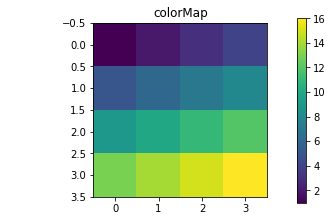

In [58]:
import numpy as np
import matplotlib.pyplot as plt

H = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]])  # added some commas and array creation code

fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

In [63]:
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

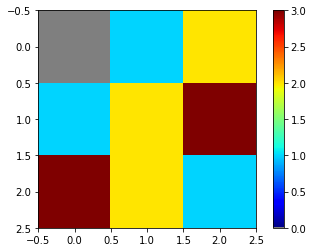

In [65]:
t = np.array([[0, 1, 2], [1, 2, 3], [3, 2, 1]])
import matplotlib.pyplot as plt
# plt.imshow(t)
# plt.show()
plt.imshow(t, cmap=cmap, interpolation='nearest')
cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

plt.colorbar(cmap=cmap, orientation='vertical')
plt.show()

np.max(t) = 3


Text(0,0.5,'occurence')

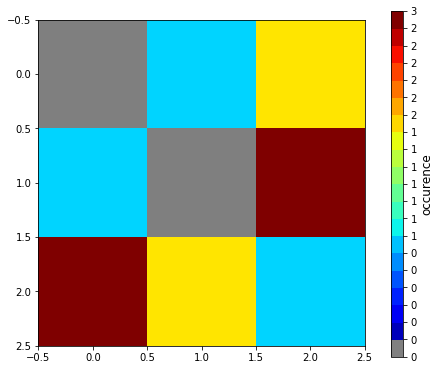

In [78]:
# setup the plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# define the data
t = np.array([[0, 1, 2], [1, 0, 3], [3, 2, 1]])

# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5, .5, .5, 1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
print("np.max(t) = {}".format(np.max(t)))
bounds = np.linspace(0, np.max(t), 21)
import matplotlib as mpl
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# make the scatter
# scat = ax.scatter(x,y,c=tag,s=np.random.randint(100,500,20),cmap=cmap, norm=norm)
plt.imshow(t, cmap=cmap, interpolation='nearest')

# create a second axes for the colorbar
ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
cb = mpl.colorbar.ColorbarBase(
    ax2, cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%1i')

ax.set_title('')
ax2.set_ylabel('occurence', size=12)

b
g
r
c
